In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
vendas_df = pd.read_csv('Dados/venda.csv')
vendas_df.head()

/home/paulotk/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL
0,0,2021/02/10,45659.0,17631,1,E-COMMERCE,101
1,0,2021/02/10,45659.0,34575,1,E-COMMERCE,101
2,1,2021/02/12,70766.0,2240,1,E-COMMERCE,101
3,2,2021/02/12,42579.0,17707,1,E-COMMERCE,101
4,2,2021/02/12,42579.0,8952,1,E-COMMERCE,101


In [4]:
clientes_df = pd.read_csv('Dados/cliente.csv')
clientes_df.head()

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA
0,0,,1900/01/01,2017/03/06
1,1,,1900/01/01,2017/03/06
2,2,,1900/01/01,2017/03/06
3,3,,1900/01/01,2017/02/18
4,4,,1900/01/01,2017/01/16


In [5]:
produtos_df = pd.read_csv('Dados/produto.csv', sep = ',')
produtos_df.head()

,ID_PRODUTO,UNIDADE,NIVEL 1,NIVEL 2,NIVEL 3,NIVEL 4
0,0,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS
1,1,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS
2,2,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS
3,3,UN,,,,
4,4,UN,CAES,FARMACIA,DORES E INFECCOES,ANTIBIOTICOS


# Como conhecer as demandas e alavancar as vendas?

## Hipótese 1: Diferenças entre varejo e e-commerce
## Hipótese 2: Períodos do ano com maior volume de vendas

In [6]:
#vendas_df['MES_VENDA'] = vendas_df['DATA_VENDA'].dt.month
vendas_df['MES_VENDA'] = vendas_df['DATA_VENDA'].apply(lambda x: (str(x))[5:7])
vendas_df.head()
vendas_df.tail()

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA
1859578,854530,2021/10/23,NaN,36642,10.0,Loja,113,10
1859579,854530,2021/10/23,NaN,7332,10.0,Loja,113,10
1859580,854530,2021/10/23,NaN,7333,10.0,Loja,113,10
1859581,854531,2021/10/23,106865.0,7528,1.0,Loja,113,10
1859582,854532,2021/10/23,NaN,8553,1.0,Loja,113,10


In [7]:
vendas_df['ANO_VENDA'] = vendas_df['DATA_VENDA'].apply(lambda x: (str(x))[2:4])
vendas_df.head()
vendas_df.tail()
list(vendas_df.columns)

['ID_VENDA',
 'DATA_VENDA',
 'ID_CLIENTE',
 'ID_PRODUTO',
 'QUANTIDADE',
 'CATEGORIA_VENDA',
 'FILIAL',
 'MES_VENDA',
 'ANO_VENDA']

In [8]:
vendas_df['MES_ANO_VENDA'] = vendas_df['MES_VENDA']+'-'+vendas_df['ANO_VENDA']
vendas_df.tail(30)

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA
1859553,854519,2021/10/23,106860.0,31591,2.0,Loja,113,10,21,10-21
1859554,854520,2021/10/24,NaN,44,1.0,Loja,113,10,21,10-21
1859555,854520,2021/10/24,NaN,8568,1.0,Loja,113,10,21,10-21
1859556,854520,2021/10/24,NaN,4824,1.0,Loja,113,10,21,10-21
1859557,854521,2021/10/23,106859.0,426,1.0,Loja,113,10,21,10-21
1859558,854522,2021/10/24,NaN,3752,1.0,Loja,113,10,21,10-21
1859559,854523,2021/10/23,106861.0,23944,1.0,Loja,113,10,21,10-21
1859560,854523,2021/10/23,106861.0,611,1.0,Loja,113,10,21,10-21
1859561,854523,2021/10/23,106861.0,35647,1.0,Loja,113,10,21,10-21
1859562,854523,2021/10/23,106861.0,11181,2.0,Loja,113,10,21,10-21


In [9]:
vendas_df['CATEGORIA_VENDA'][215]
#'Loja                '
#'E-COMMERCE          '
#'Estética            '
#'Clínica             '
#'Digital             '

'Loja                '

In [10]:
vendas_df[vendas_df['MES_VENDA']=='11'].head()

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA
531,356,2020/11/03,54827.0,35837,1,Loja,101,11,20,11-20
532,356,2020/11/03,54827.0,291,1,Loja,101,11,20,11-20
534,358,2020/11/03,2679.0,8827,1,Loja,101,11,20,11-20
535,358,2020/11/03,2679.0,15831,1,Loja,101,11,20,11-20
537,360,2020/11/04,18327.0,13018,1,Loja,101,11,20,11-20


Text(0, 0.5, 'Número de Vendas')

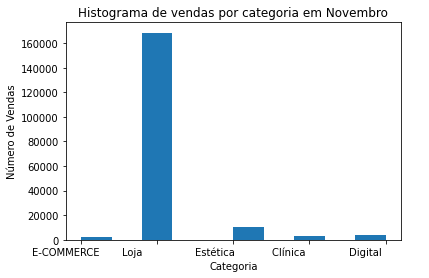

In [11]:
histograma_categoria = plt.hist(vendas_df[vendas_df['MES_VENDA']=='08']['CATEGORIA_VENDA'])
plt.title("Histograma de vendas por categoria em Novembro")
plt.xlabel("Categoria")
plt.ylabel("Número de Vendas")

In [12]:
#vendas_df['Contagem de linhas'] = 1
#vendas_df.head()

Text(0, 0.5, 'Quantidade de vendas (Loja)')

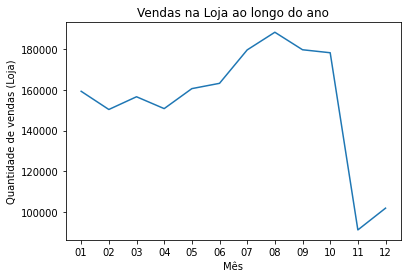

In [13]:
graph = plt.plot(vendas_df.groupby('MES_VENDA').count()['ID_VENDA'], label = 'graph')
plt.title("Vendas na Loja ao longo do ano")
plt.xlabel("Mês")
plt.ylabel("Quantidade de vendas (Loja)")

In [14]:
vendas_df['ANO_MES_VENDA'] = vendas_df['ANO_VENDA']+'-'+vendas_df['MES_VENDA']
vendas_df.head()

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA,ANO_MES_VENDA
0,0,2021/02/10,45659.0,17631,1,E-COMMERCE,101,02,21,02-21,21-02
1,0,2021/02/10,45659.0,34575,1,E-COMMERCE,101,02,21,02-21,21-02
2,1,2021/02/12,70766.0,2240,1,E-COMMERCE,101,02,21,02-21,21-02
3,2,2021/02/12,42579.0,17707,1,E-COMMERCE,101,02,21,02-21,21-02
4,2,2021/02/12,42579.0,8952,1,E-COMMERCE,101,02,21,02-21,21-02


In [15]:
#vendas_2021 = vendas_df[vendas_df['ANO_VENDA']=='21']
#vendas_2021.head()
#vendas_2020 = vendas_df[vendas_df['ANO_VENDA']=='20']
#vendas_2020.head()
#vendas_df[vendas_df['CATEGORIA_VENDA']=='Loja                '].groupby(['ANO_MES_VENDA','ID_VENDA']).count()['COUNT_ID_VENDA']= 1
#vendas_df[vendas_df['CATEGORIA_VENDA']=='Loja                '].groupby(['ANO_MES_VENDA','ID_VENDA']).count()
#vendas_df[vendas_df['ANO_MES_VENDA']=='20-01'][vendas_df['CATEGORIA_VENDA']=='Loja                '].groupby(['ID_VENDA'])
#vendas_df[vendas_df['CATEGORIA_VENDA']=='Loja                '].groupby(['MES_ANO_VENDA']).count()
vendas_unicas = vendas_df['ID_VENDA'].unique()
vendas_unicas = pd.DataFrame(vendas_unicas).rename(columns={0: 'ID_VENDA'})
vendas_unicas.head()
cestas = pd.merge(vendas_unicas, vendas_df, how='right', on='ID_VENDA')
cestas.head(10)

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA,ANO_MES_VENDA
0,0,2021/02/10,45659.0,17631,1,E-COMMERCE,101,02,21,02-21,21-02
1,0,2021/02/10,45659.0,34575,1,E-COMMERCE,101,02,21,02-21,21-02
2,1,2021/02/12,70766.0,2240,1,E-COMMERCE,101,02,21,02-21,21-02
3,2,2021/02/12,42579.0,17707,1,E-COMMERCE,101,02,21,02-21,21-02
4,2,2021/02/12,42579.0,8952,1,E-COMMERCE,101,02,21,02-21,21-02
5,2,2021/02/12,42579.0,26107,2,E-COMMERCE,101,02,21,02-21,21-02
6,2,2021/02/12,42579.0,21673,2,E-COMMERCE,101,02,21,02-21,21-02
7,3,2021/02/12,72267.0,3425,1,E-COMMERCE,101,02,21,02-21,21-02
8,4,2021/02/15,70878.0,12985,1,E-COMMERCE,101,02,21,02-21,21-02
9,5,2021/02/15,70888.0,32293,1,E-COMMERCE,101,02,21,02-21,21-02


In [16]:
print(vendas_df.groupby('ANO_MES_VENDA').count()['MES_ANO_VENDA'])
lista1 = []
lista2 = []
for i in range(1,10):
    lista1.append('20-0'+str(i))
    lista2.append('0'+str(i)+'-20')
lista1.append('20-10')
lista1.append('20-11')
lista1.append('20-12')
lista2.append('10-20')
lista2.append('11-20')
lista2.append('12-20')
for i in range(1,10):
    lista1.append('21-0'+str(i))
    lista2.append('0'+str(i)+'-21')
lista1.append('20-10')
lista2.append('10-20')
print(lista1, lista2)

ANO_MES_VENDA
20-01     60023
20-02     60988
20-03     65216
20-04     58092
20-05     63251
20-06     65513
20-07     74634
20-08     84374
20-09     80448
20-10     94592
20-11     91180
20-12    101869
21-01     99250
21-02     89350
21-03     91376
21-04     92675
21-05     97336
21-06     97677
21-07    104972
21-08    103910
21-09     99235
21-10     83622
Name: MES_ANO_VENDA, dtype: int64
['20-01', '20-02', '20-03', '20-04', '20-05', '20-06', '20-07', '20-08', '20-09', '20-10', '20-11', '20-12', '21-01', '21-02', '21-03', '21-04', '21-05', '21-06', '21-07', '21-08', '21-09', '20-10'] ['01-20', '02-20', '03-20', '04-20', '05-20', '06-20', '07-20', '08-20', '09-20', '10-20', '11-20', '12-20', '01-21', '02-21', '03-21', '04-21', '05-21', '06-21', '07-21', '08-21', '09-21', '10-20']


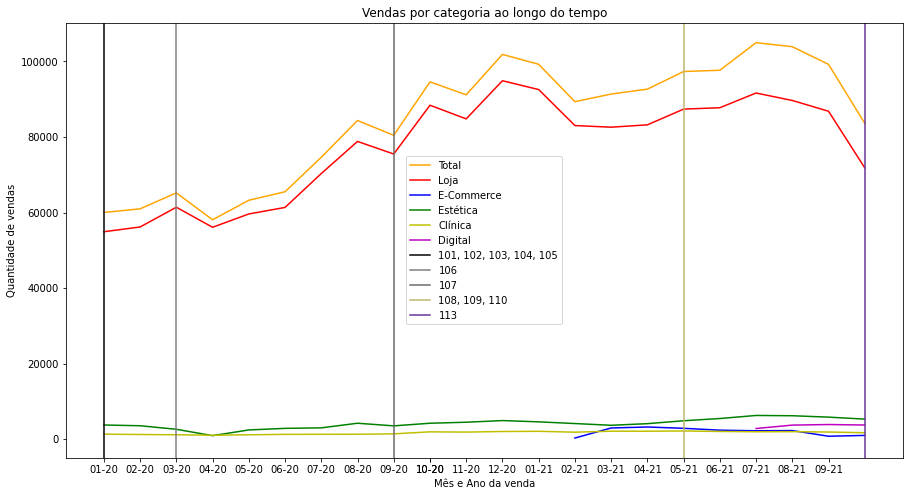

In [17]:
#'Loja                '
#'E-COMMERCE          '
#'Estética            '
#'Clínica             '
#'Digital             '
plt.figure(figsize=(15,8))
plt.plot(vendas_df.groupby('ANO_MES_VENDA').count()['ID_VENDA'], color ='orange',label = 'Total')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='Loja                '].groupby('ANO_MES_VENDA').count()['ID_VENDA'], color = 'r',label = 'Loja')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='E-COMMERCE          '].groupby('ANO_MES_VENDA').count()['ID_VENDA'], color = 'b',label = 'E-Commerce')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='Estética            '].groupby('ANO_MES_VENDA').count()['ID_VENDA'], color = 'g',label = 'Estética')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='Clínica             '].groupby('ANO_MES_VENDA').count()['ID_VENDA'], color = 'y',label = 'Clínica')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='Digital             '].groupby('ANO_MES_VENDA').count()['ID_VENDA'], color = 'm',label = 'Digital')
plt.axvline(x = '20-01', color = 'black', linestyle = '-', label = '101, 102, 103, 104, 105')
plt.axvline(x = '20-03', color = 'grey', linestyle = '-', label = '106')
plt.axvline(x = '20-09', color = 'dimgrey', linestyle = '-', label = '107')
plt.axvline(x = '21-05', color = 'darkkhaki', linestyle = '-', label = '108, 109, 110')
plt.axvline(x = '21-10', color = 'rebeccapurple', linestyle = '-', label = '113')
plt.title("Vendas por categoria ao longo do tempo")
plt.xticks(lista1, lista2)
plt.xlabel("Mês e Ano da venda")
plt.ylabel("Quantidade de vendas")
plt.legend()
plt.show()

In [18]:
vendas_df.groupby('CATEGORIA_VENDA').count()

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA,ANO_MES_VENDA
CATEGORIA_VENDA,,,,,,,,,,
Clínica,37179,37179,36902,37179,37179,37179,37179,37179,37179,37179
Digital,14207,14207,13471,14207,14207,14207,14207,14207,14207,14207
E-COMMERCE,18101,18101,18101,18101,18101,18101,18101,18101,18101,18101
Estética,91187,91187,90930,91187,91187,91187,91187,91187,91187,91187
Loja,1698909,1698909,770313,1698909,1698909,1698909,1698909,1698909,1698909,1698909


In [19]:
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859583 entries, 0 to 1859582
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID_VENDA         int64  
 1   DATA_VENDA       object 
 2   ID_CLIENTE       float64
 3   ID_PRODUTO       int64  
 4   QUANTIDADE       object 
 5   CATEGORIA_VENDA  object 
 6   FILIAL           int64  
 7   MES_VENDA        object 
 8   ANO_VENDA        object 
 9   MES_ANO_VENDA    object 
 10  ANO_MES_VENDA    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 156.1+ MB


In [20]:
vendas_df.describe()

,ID_VENDA,ID_CLIENTE,ID_PRODUTO,FILIAL
count,1.859583e+06,929717.00000,1.859583e+06,1.859583e+06
mean,4.337302e+05,48943.58105,1.748156e+04,1.033833e+02
std,2.405925e+05,26031.33408,1.175073e+04,2.222510e+00
min,0.000000e+00,7.00000,0.000000e+00,1.010000e+02
25%,2.269360e+05,29686.00000,7.761000e+03,1.020000e+02
50%,4.335990e+05,48219.00000,1.537900e+04,1.030000e+02
75%,6.409040e+05,67863.00000,2.660900e+04,1.050000e+02
max,8.545320e+05,106865.00000,3.836200e+04,1.130000e+02


In [21]:
cliente_venda = pd.merge(
    vendas_df, # o DataFrame da esquerda
    clientes_df, # o DataFrame da direita
    how='inner', # o tipo de join que queremos fazer
    on='ID_CLIENTE') # baseado em quais valores em comum (chave)
cliente_venda.info()
cliente_venda.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927362 entries, 0 to 927361
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID_VENDA         927362 non-null  int64  
 1   DATA_VENDA       927362 non-null  object 
 2   ID_CLIENTE       927362 non-null  float64
 3   ID_PRODUTO       927362 non-null  int64  
 4   QUANTIDADE       927362 non-null  object 
 5   CATEGORIA_VENDA  927362 non-null  object 
 6   FILIAL           927362 non-null  int64  
 7   MES_VENDA        927362 non-null  object 
 8   ANO_VENDA        927362 non-null  object 
 9   MES_ANO_VENDA    927362 non-null  object 
 10  ANO_MES_VENDA    927362 non-null  object 
 11  SEXO             927362 non-null  object 
 12  DATA_NASCIMENTO  927362 non-null  object 
 13  PRIMEIRA_COMPRA  927362 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 106.1+ MB


,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA,ANO_MES_VENDA,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA
0,0,2021/02/10,45659.0,17631,1,E-COMMERCE,101,02,21,02-21,21-02,M,1985/07/31,2020/09/08
1,0,2021/02/10,45659.0,34575,1,E-COMMERCE,101,02,21,02-21,21-02,M,1985/07/31,2020/09/08
2,16,2020/09/08,45659.0,11876,1,Loja,101,09,20,09-20,20-09,M,1985/07/31,2020/09/08
3,18,2020/09/08,45659.0,4001,1,Loja,101,09,20,09-20,20-09,M,1985/07/31,2020/09/08
4,58,2020/09/15,45659.0,11875,1,Loja,101,09,20,09-20,20-09,M,1985/07/31,2020/09/08


## A Fazer:
## 1. Gráfico de vendas por categoria (count de ID_VENDA) FEITO
## 2. Gráfico de ticket por categoria ao longo do tempo (N CONSIGO)
## 3. Adicionar data em que cada nova filial foi aberta FEITO

In [22]:
venda_produto = pd.merge(
    vendas_df, # o DataFrame da esquerda
    produtos_df, # o DataFrame da direita
    how='inner', # o tipo de join que queremos fazer
    on='ID_PRODUTO') # baseado em quais valores em comum (chave)
venda_produto.info()
venda_produto.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731080 entries, 0 to 1731079
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID_VENDA         int64  
 1   DATA_VENDA       object 
 2   ID_CLIENTE       float64
 3   ID_PRODUTO       int64  
 4   QUANTIDADE       object 
 5   CATEGORIA_VENDA  object 
 6   FILIAL           int64  
 7   MES_VENDA        object 
 8   ANO_VENDA        object 
 9   MES_ANO_VENDA    object 
 10  ANO_MES_VENDA    object 
 11  UNIDADE          object 
 12  NIVEL 1          object 
 13  NIVEL 2          object 
 14  NIVEL 3          object 
 15  NIVEL 4          object 
dtypes: float64(1), int64(3), object(12)
memory usage: 224.5+ MB


,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA,ANO_MES_VENDA,UNIDADE,NIVEL 1,NIVEL 2,NIVEL 3,NIVEL 4
0,0,2021/02/10,45659.0,17631,1,E-COMMERCE,101,02,21,02-21,21-02,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS
1,50542,2020/05/27,29085.0,17631,2,Loja,101,05,20,05-20,20-05,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS
2,50679,2020/01/25,NaN,17631,1,Loja,101,01,20,01-20,20-01,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS
3,51203,2020/01/28,NaN,17631,1,Loja,101,01,20,01-20,20-01,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS
4,51391,2020/01/28,NaN,17631,1,Loja,101,01,20,01-20,20-01,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS


In [23]:
n1 = 'NIVEL 1'
vendas_especificadas = vendas_df.merge(produtos_df, how='left', on='ID_PRODUTO')
vendas_especificadas.head()

pd.crosstab(
    vendas_especificadas[vendas_especificadas['FILIAL'] == 101].ID_VENDA,
    vendas_especificadas[vendas_especificadas['FILIAL'] == 101].n1,
    margins=True,
    margins_name = 'All'
)

AttributeError: 'DataFrame' object has no attribute 'n1'

In [24]:
lista3 = ['2020-01-02','2020-02-02', '2020-03-02','2020-04-02','2020-05-02', '2020-06-02', '2020-07-02', 
          '2020-08-02', '2020-09-02', '2020-10-02', '2020-11-02', '2020-12-02', '2021-01-02', '2021-02-02',
         '2021-03-02', '2021-04-02', '2021-05-02', '2021-06-02', '2021-07-02', '2021-08-02', '2021-09-02',
         '2021-10-02']
lista4 = []
lista5 = []
for i in lista3:
    lista5.append(i.replace('-', '/'))
    lista4.append(i[2:7])
print(lista4, lista5)

['20-01', '20-02', '20-03', '20-04', '20-05', '20-06', '20-07', '20-08', '20-09', '20-10', '20-11', '20-12', '21-01', '21-02', '21-03', '21-04', '21-05', '21-06', '21-07', '21-08', '21-09', '21-10'] ['2020/01/02', '2020/02/02', '2020/03/02', '2020/04/02', '2020/05/02', '2020/06/02', '2020/07/02', '2020/08/02', '2020/09/02', '2020/10/02', '2020/11/02', '2020/12/02', '2021/01/02', '2021/02/02', '2021/03/02', '2021/04/02', '2021/05/02', '2021/06/02', '2021/07/02', '2021/08/02', '2021/09/02', '2021/10/02']


In [25]:
vendas_df[vendas_df['CATEGORIA_VENDA']=='Loja                '].groupby('DATA_VENDA').count().head()

,ID_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA,ANO_MES_VENDA
DATA_VENDA,,,,,,,,,,
2020/01/02,2058,55,2058,2058,2058,2058,2058,2058,2058,2058
2020/01/03,1988,33,1988,1988,1988,1988,1988,1988,1988,1988
2020/01/04,2492,49,2492,2492,2492,2492,2492,2492,2492,2492
2020/01/05,1609,21,1609,1609,1609,1609,1609,1609,1609,1609
2020/01/06,2014,47,2014,2014,2014,2014,2014,2014,2014,2014


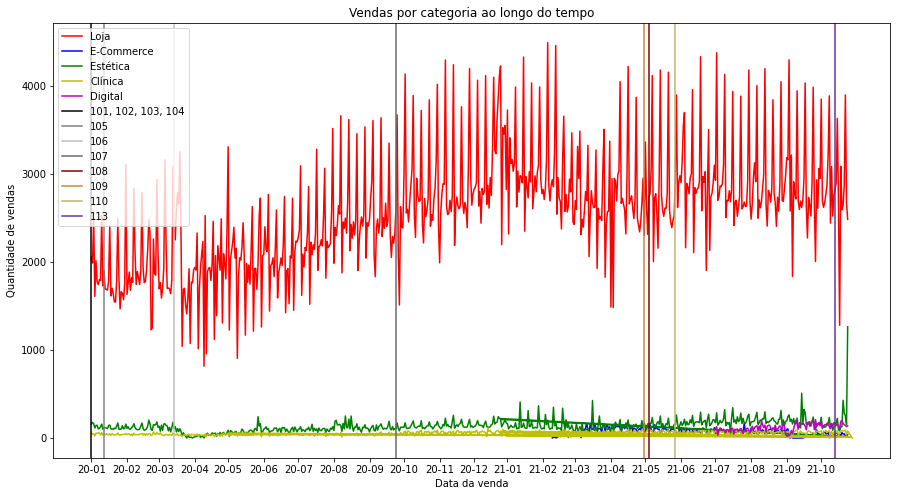

In [26]:
plt.figure(figsize=(15,8))
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='Loja                '].groupby('DATA_VENDA').count()['ID_VENDA'],  color = 'r',label = 'Loja')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='E-COMMERCE          '].groupby('DATA_VENDA').count()['ID_VENDA'], color = 'b',label = 'E-Commerce')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='Estética            '].groupby('DATA_VENDA').count()['ID_VENDA'], color = 'g',label = 'Estética')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='Clínica             '].groupby('DATA_VENDA').count()['ID_VENDA'], color = 'y',label = 'Clínica')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='Digital             '].groupby('DATA_VENDA').count()['ID_VENDA'], color = 'm',label = 'Digital')
plt.axvline(x = '2020/01/02', color = 'black', linestyle = '-', label = '101, 102, 103, 104')
plt.axvline(x = '2020/01/13', color = 'grey', linestyle = '-', label = '105')
plt.axvline(x = '2020/03/15', color = 'silver', linestyle = '-', label = '106')
plt.axvline(x = '2020/09/25', color = 'dimgrey', linestyle = '-', label = '107')
plt.axvline(x = '2021/05/05', color = 'maroon', linestyle = '-', label = '108')
plt.axvline(x = '2021/05/01', color = 'peru', linestyle = '-', label = '109')
plt.axvline(x = '2021/05/28', color = 'darkkhaki', linestyle = '-', label = '110')
plt.axvline(x = '2021/10/14', color = 'rebeccapurple', linestyle = '-', label = '113')
plt.title("Vendas por categoria ao longo do tempo")
plt.xticks(lista5, lista4)
plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
plt.legend()
plt.show()

In [27]:
vendas_df['ID_STR'] = vendas_df['ID_VENDA'].apply(lambda x: (str(x)))
vendas_df['FI_STR'] = vendas_df['FILIAL'].apply(lambda x: (str(x)))

In [28]:
vendas_df['CESTA'] = vendas_df['ID_STR']+'-'+vendas_df['FI_STR']
vendas_df.head()

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA,ANO_MES_VENDA,ID_STR,FI_STR,CESTA
0,0,2021/02/10,45659.0,17631,1,E-COMMERCE,101,02,21,02-21,21-02,0,101,0-101
1,0,2021/02/10,45659.0,34575,1,E-COMMERCE,101,02,21,02-21,21-02,0,101,0-101
2,1,2021/02/12,70766.0,2240,1,E-COMMERCE,101,02,21,02-21,21-02,1,101,1-101
3,2,2021/02/12,42579.0,17707,1,E-COMMERCE,101,02,21,02-21,21-02,2,101,2-101
4,2,2021/02/12,42579.0,8952,1,E-COMMERCE,101,02,21,02-21,21-02,2,101,2-101


In [29]:
vendas_df2 = vendas_df.drop_duplicates(subset = 'CESTA', keep='first')
vendas_df2.head()

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA,ANO_MES_VENDA,ID_STR,FI_STR,CESTA
0,0,2021/02/10,45659.0,17631,1,E-COMMERCE,101,02,21,02-21,21-02,0,101,0-101
2,1,2021/02/12,70766.0,2240,1,E-COMMERCE,101,02,21,02-21,21-02,1,101,1-101
3,2,2021/02/12,42579.0,17707,1,E-COMMERCE,101,02,21,02-21,21-02,2,101,2-101
7,3,2021/02/12,72267.0,3425,1,E-COMMERCE,101,02,21,02-21,21-02,3,101,3-101
8,4,2021/02/15,70878.0,12985,1,E-COMMERCE,101,02,21,02-21,21-02,4,101,4-101


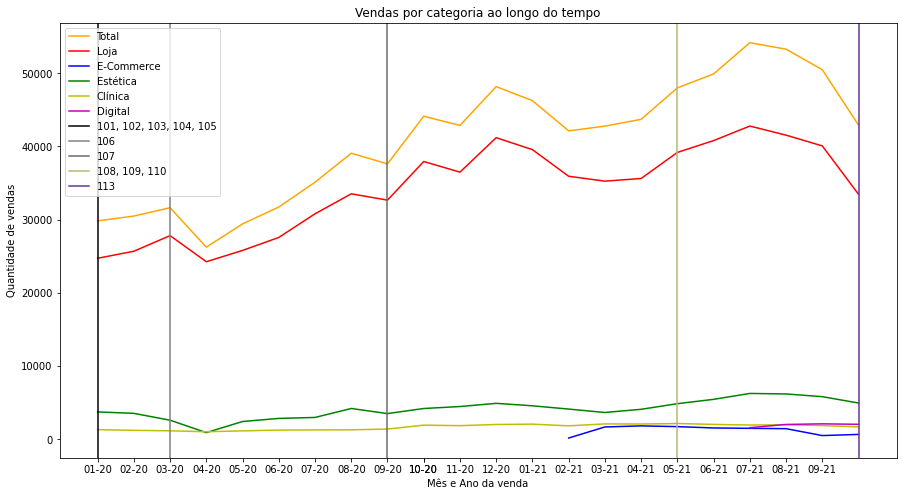

In [30]:
plt.figure(figsize=(15,8))
plt.plot(vendas_df2.groupby('ANO_MES_VENDA').count()['ID_VENDA'], color ='orange',label = 'Total')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Loja                '].groupby('ANO_MES_VENDA').count()['ID_VENDA'], color = 'r',label = 'Loja')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='E-COMMERCE          '].groupby('ANO_MES_VENDA').count()['ID_VENDA'], color = 'b',label = 'E-Commerce')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Estética            '].groupby('ANO_MES_VENDA').count()['ID_VENDA'], color = 'g',label = 'Estética')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Clínica             '].groupby('ANO_MES_VENDA').count()['ID_VENDA'], color = 'y',label = 'Clínica')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Digital             '].groupby('ANO_MES_VENDA').count()['ID_VENDA'], color = 'm',label = 'Digital')
plt.axvline(x = '20-01', color = 'black', linestyle = '-', label = '101, 102, 103, 104, 105')
plt.axvline(x = '20-03', color = 'grey', linestyle = '-', label = '106')
plt.axvline(x = '20-09', color = 'dimgrey', linestyle = '-', label = '107')
plt.axvline(x = '21-05', color = 'darkkhaki', linestyle = '-', label = '108, 109, 110')
plt.axvline(x = '21-10', color = 'rebeccapurple', linestyle = '-', label = '113')
plt.title("Vendas por categoria ao longo do tempo")
plt.xticks(lista1, lista2)
plt.xlabel("Mês e Ano da venda")
plt.ylabel("Quantidade de vendas")
plt.legend()
plt.show()

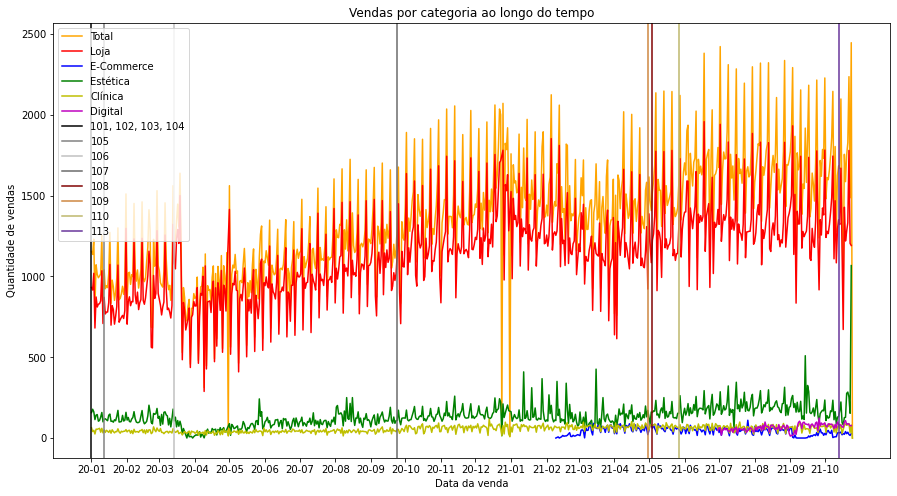

In [31]:
plt.figure(figsize=(15,8))
plt.plot(vendas_df2.groupby('DATA_VENDA').count()['ID_VENDA'],  color = 'orange',label = 'Total')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Loja                '].groupby('DATA_VENDA').count()['ID_VENDA'],  color = 'r',label = 'Loja')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='E-COMMERCE          '].groupby('DATA_VENDA').count()['ID_VENDA'], color = 'b',label = 'E-Commerce')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Estética            '].groupby('DATA_VENDA').count()['ID_VENDA'], color = 'g',label = 'Estética')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Clínica             '].groupby('DATA_VENDA').count()['ID_VENDA'], color = 'y',label = 'Clínica')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Digital             '].groupby('DATA_VENDA').count()['ID_VENDA'], color = 'm',label = 'Digital')
plt.axvline(x = '2020/01/02', color = 'black', linestyle = '-', label = '101, 102, 103, 104')
plt.axvline(x = '2020/01/13', color = 'grey', linestyle = '-', label = '105')
plt.axvline(x = '2020/03/15', color = 'silver', linestyle = '-', label = '106')
plt.axvline(x = '2020/09/25', color = 'dimgrey', linestyle = '-', label = '107')
plt.axvline(x = '2021/05/05', color = 'maroon', linestyle = '-', label = '108')
plt.axvline(x = '2021/05/01', color = 'peru', linestyle = '-', label = '109')
plt.axvline(x = '2021/05/28', color = 'darkkhaki', linestyle = '-', label = '110')
plt.axvline(x = '2021/10/14', color = 'rebeccapurple', linestyle = '-', label = '113')
plt.title("Vendas por categoria ao longo do tempo")
plt.xticks(lista5, lista4)
plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
plt.legend()
plt.show()

In [32]:
vendas_df['DATA_DT'] = pd.to_datetime(vendas_df['DATA_VENDA'])
vendas_df.head()
vendas_df2['DATA_DT'] = pd.to_datetime(vendas_df2['DATA_VENDA'])
vendas_df2.head()

/tmp/ipykernel_4109/1538315175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_df2['DATA_DT'] = pd.to_datetime(vendas_df2['DATA_VENDA'])


,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA,ANO_MES_VENDA,ID_STR,FI_STR,CESTA,DATA_DT
0,0,2021/02/10,45659.0,17631,1,E-COMMERCE,101,02,21,02-21,21-02,0,101,0-101,2021-02-10
2,1,2021/02/12,70766.0,2240,1,E-COMMERCE,101,02,21,02-21,21-02,1,101,1-101,2021-02-12
3,2,2021/02/12,42579.0,17707,1,E-COMMERCE,101,02,21,02-21,21-02,2,101,2-101,2021-02-12
7,3,2021/02/12,72267.0,3425,1,E-COMMERCE,101,02,21,02-21,21-02,3,101,3-101,2021-02-12
8,4,2021/02/15,70878.0,12985,1,E-COMMERCE,101,02,21,02-21,21-02,4,101,4-101,2021-02-15


In [33]:
vendas_df2['DIA_DA_SEMANA'] = pd.to_datetime(vendas_df2['DATA_VENDA']).dt.dayofweek
vendas_df2.head()

/tmp/ipykernel_4109/2166973423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_df2['DIA_DA_SEMANA'] = pd.to_datetime(vendas_df2['DATA_VENDA']).dt.dayofweek


,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA,ANO_MES_VENDA,ID_STR,FI_STR,CESTA,DATA_DT,DIA_DA_SEMANA
0,0,2021/02/10,45659.0,17631,1,E-COMMERCE,101,02,21,02-21,21-02,0,101,0-101,2021-02-10,2
2,1,2021/02/12,70766.0,2240,1,E-COMMERCE,101,02,21,02-21,21-02,1,101,1-101,2021-02-12,4
3,2,2021/02/12,42579.0,17707,1,E-COMMERCE,101,02,21,02-21,21-02,2,101,2-101,2021-02-12,4
7,3,2021/02/12,72267.0,3425,1,E-COMMERCE,101,02,21,02-21,21-02,3,101,3-101,2021-02-12,4
8,4,2021/02/15,70878.0,12985,1,E-COMMERCE,101,02,21,02-21,21-02,4,101,4-101,2021-02-15,0


In [34]:
vendas_df2.groupby('DIA_DA_SEMANA').count()

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA,ANO_MES_VENDA,ID_STR,FI_STR,CESTA,DATA_DT
DIA_DA_SEMANA,,,,,,,,,,,,,,,
0,125644,125644,67576,125644,125644,125644,125644,125644,125644,125644,125644,125644,125644,125644,125644
1,122375,122375,65728,122375,122375,122375,122375,122375,122375,122375,122375,122375,122375,122375,122375
2,126199,126199,67686,126199,126199,126199,126199,126199,126199,126199,126199,126199,126199,126199,126199
3,126949,126949,67951,126949,126949,126949,126949,126949,126949,126949,126949,126949,126949,126949,126949
4,130093,130093,69632,130093,130093,130093,130093,130093,130093,130093,130093,130093,130093,130093,130093
5,166603,166603,87378,166603,166603,166603,166603,166603,166603,166603,166603,166603,166603,166603,166603
6,102135,102135,50708,102135,102135,102135,102135,102135,102135,102135,102135,102135,102135,102135,102135


In [35]:
vendas_df['DIA_DA_SEMANA'] = pd.to_datetime(vendas_df['DATA_VENDA']).dt.dayofweek
vendas_df.groupby('DIA_DA_SEMANA').count()

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL,MES_VENDA,ANO_VENDA,MES_ANO_VENDA,ANO_MES_VENDA,ID_STR,FI_STR,CESTA,DATA_DT
DIA_DA_SEMANA,,,,,,,,,,,,,,,
0,250127,250127,126151,250127,250127,250127,250127,250127,250127,250127,250127,250127,250127,250127,250127
1,248108,248108,126954,248108,248108,248108,248108,248108,248108,248108,248108,248108,248108,248108,248108
2,256160,256160,129142,256160,256160,256160,256160,256160,256160,256160,256160,256160,256160,256160,256160
3,259671,259671,131710,259671,259671,259671,259671,259671,259671,259671,259671,259671,259671,259671,259671
4,264516,264516,133539,264516,264516,264516,264516,264516,264516,264516,264516,264516,264516,264516,264516
5,359896,359896,178147,359896,359896,359896,359896,359896,359896,359896,359896,359896,359896,359896,359896
6,221105,221105,104074,221105,221105,221105,221105,221105,221105,221105,221105,221105,221105,221105,221105


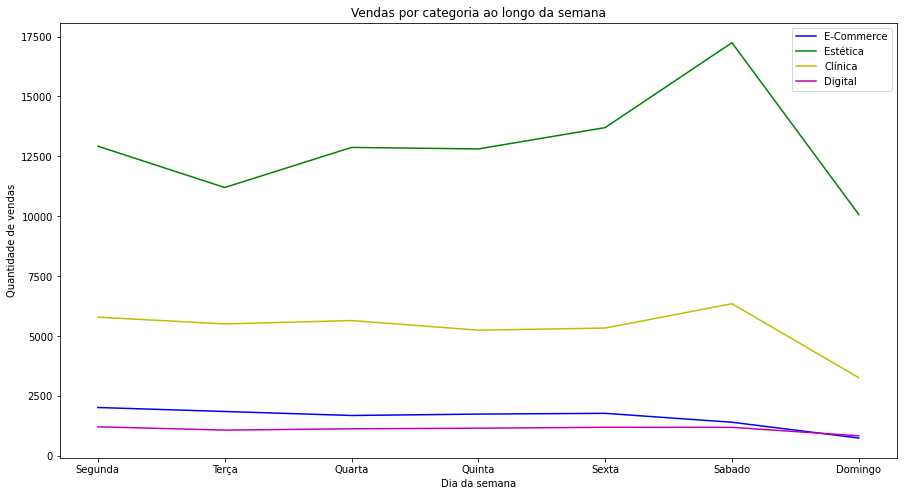

In [36]:
plt.figure(figsize=(15,8))
#plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Loja                '].groupby('DIA_DA_SEMANA').count()['ID_VENDA'],  color = 'r',label = 'Loja')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='E-COMMERCE          '].groupby('DIA_DA_SEMANA').count()['ID_VENDA'], color = 'b',label = 'E-Commerce')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Estética            '].groupby('DIA_DA_SEMANA').count()['ID_VENDA'], color = 'g',label = 'Estética')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Clínica             '].groupby('DIA_DA_SEMANA').count()['ID_VENDA'], color = 'y',label = 'Clínica')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Digital             '].groupby('DIA_DA_SEMANA').count()['ID_VENDA'], color = 'm',label = 'Digital')
plt.title("Vendas por categoria ao longo da semana")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo'])
plt.xlabel("Dia da semana")
plt.ylabel("Quantidade de vendas")
plt.legend()
plt.show()

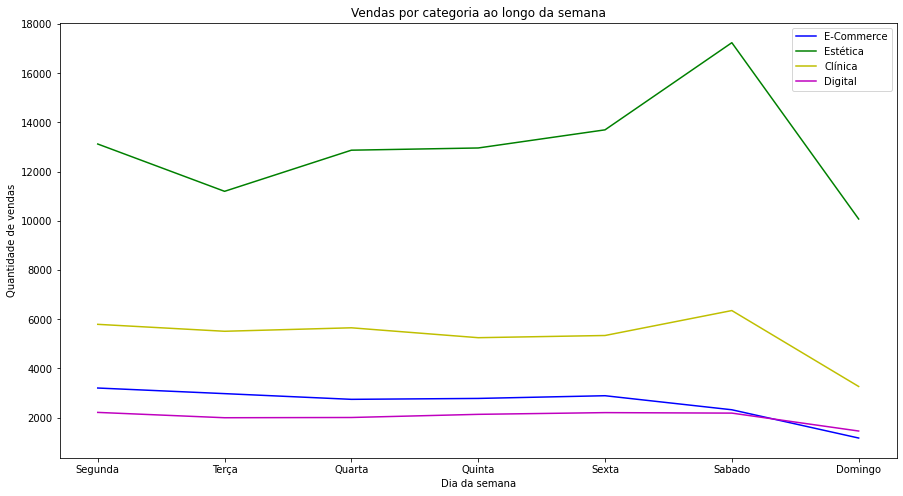

In [37]:
plt.figure(figsize=(15,8))
#plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='Loja                '].groupby('DIA_DA_SEMANA').count()['ID_VENDA'],  color = 'r',label = 'Loja')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='E-COMMERCE          '].groupby('DIA_DA_SEMANA').count()['ID_VENDA'], color = 'b',label = 'E-Commerce')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='Estética            '].groupby('DIA_DA_SEMANA').count()['ID_VENDA'], color = 'g',label = 'Estética')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='Clínica             '].groupby('DIA_DA_SEMANA').count()['ID_VENDA'], color = 'y',label = 'Clínica')
plt.plot(vendas_df[vendas_df['CATEGORIA_VENDA']=='Digital             '].groupby('DIA_DA_SEMANA').count()['ID_VENDA'], color = 'm',label = 'Digital')
plt.title("Vendas por categoria ao longo da semana")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo'])
plt.xlabel("Dia da semana")
plt.ylabel("Quantidade de vendas")
plt.legend()
plt.show()

In [38]:
mean_loj = vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Loja                '].groupby('DIA_DA_SEMANA').count().mean()['ID_VENDA']
mean_e_c = vendas_df2[vendas_df2['CATEGORIA_VENDA']=='E-COMMERCE          '].groupby('DIA_DA_SEMANA').count().mean()['ID_VENDA']
mean_est = vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Estética            '].groupby('DIA_DA_SEMANA').count().mean()['ID_VENDA']
mean_cli = vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Clínica             '].groupby('DIA_DA_SEMANA').count().mean()['ID_VENDA']
mean_dig = vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Digital             '].groupby('DIA_DA_SEMANA').count().mean()['ID_VENDA']

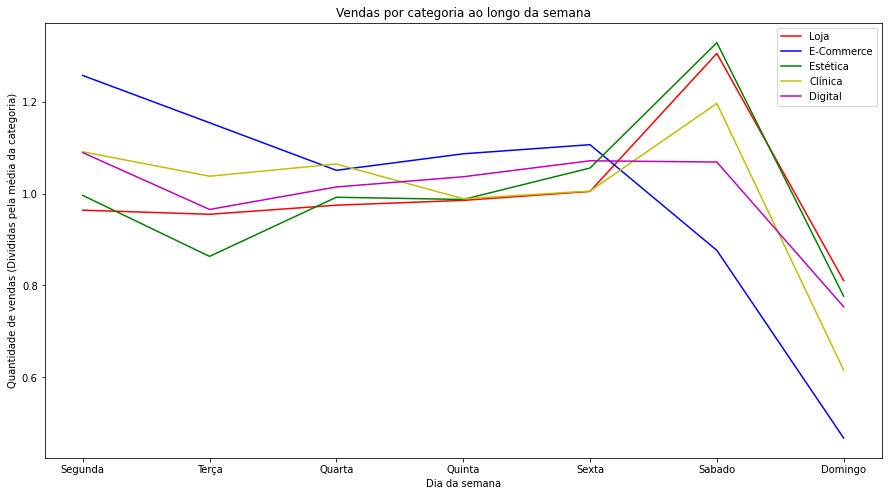

In [39]:
plt.figure(figsize=(15,8))
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Loja                '].groupby('DIA_DA_SEMANA').count()['ID_VENDA']/mean_loj,  color = 'r',label = 'Loja')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='E-COMMERCE          '].groupby('DIA_DA_SEMANA').count()['ID_VENDA']/mean_e_c, color = 'b',label = 'E-Commerce')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Estética            '].groupby('DIA_DA_SEMANA').count()['ID_VENDA']/mean_est, color = 'g',label = 'Estética')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Clínica             '].groupby('DIA_DA_SEMANA').count()['ID_VENDA']/mean_cli, color = 'y',label = 'Clínica')
plt.plot(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Digital             '].groupby('DIA_DA_SEMANA').count()['ID_VENDA']/mean_dig, color = 'm',label = 'Digital')
plt.title("Vendas por categoria ao longo da semana")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo'])
plt.xlabel("Dia da semana")
plt.ylabel("Quantidade de vendas (Divididas pela média da categoria)")
plt.legend()
plt.show()

In [45]:
for i in range(7):
    print(vendas_df2[vendas_df2['CATEGORIA_VENDA']=='Digital             '].groupby('DIA_DA_SEMANA').count()['ID_VENDA'][i]/mean_dig)

1.0893243415192773
0.9655172413793103
1.0145056622980022
1.036773126351953
1.0715103702761164
1.0688382745896423
0.7535309835856979
